In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,mutual_info_classif,f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier,DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor
from scipy.stats import zscore


In [ ]:
#loading data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df[df.columns[:12]]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0


In [ ]:
df[df.columns[12:]]

,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...
8420,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
#check metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [ ]:
#check null values
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [ ]:
#check unique values and there count
for i in df.columns:
  print(i)
  print('\n','-'*20)
  print(df[i].value_counts())

Date

 --------------------
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
Location

 --------------------
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
MinTemp

 --------------------
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
MaxTemp

 --------------------
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
Rainfall

 --------------------
0.0      5299
0

In [ ]:
#listing continuous features and categorical features
cont_f=[]
cat_f=[]
ponter=1
for i in df.columns:
  if df[i].dtype =='float64':
    cont_f.append(i)
  else:
    cat_f.append(i)

In [ ]:
#filling null values of continuous features with mean by location wise
fillna_df=df[cont_f].fillna(df.groupby('Location')[cont_f].transform('mean'))

In [ ]:
#cross check null values
fillna_df.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      2724
Sunshine         2929
WindGustSpeed     822
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1304
Pressure3pm      1304
Cloud9am          687
Cloud3pm          687
Temp9am             0
Temp3pm             0
dtype: int64

still null values present, need to check location wise individual features mean to confirm no null values fill by fillna method

In [ ]:
#checking mean of each feature by location wise
group_means = df.groupby('Location')[cont_f].mean()
print(group_means)

                MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                              
Adelaide      10.980000  21.435122  1.407960     5.005594       NaN   
Albury        10.045233  22.821729  2.122272          NaN       NaN   
Brisbane      15.372837  25.465052  3.112544     4.874740  7.927857   
CoffsHarbour  13.705082  23.273934  5.439016     3.658389  7.332570   
Darwin        21.324800  31.966800  2.735200     6.353414  9.389200   
Melbourne     12.443280  21.555857  2.274567     4.529963  6.417901   
Newcastle     12.918325  23.647036  3.032921          NaN       NaN   
Penrith       11.279668  23.378838  2.358664          NaN       NaN   
PerthAirport  13.172674  25.907558  1.916279     5.784788  8.801000   
Uluru          5.997436  22.939474  0.010256          NaN       NaN   
Williamtown   14.247557  25.110732  3.643847     9.340230  8.384211   
Wollongong    15.442918  21.728205  3.175966          NaN       NaN   

     

few location have all null values for sepcific feature so thats whay there mean is also nan for specific location  
first i will replace this nan with median if it not work well then i will try with mean

In [ ]:
#filling null values of those features who's location wise mean is nan
fillna_df['Evaporation'].fillna(df['Evaporation'].median(),inplace=True)
fillna_df['Sunshine'].fillna(df['Sunshine'].median(),inplace=True)
fillna_df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(),inplace=True)
fillna_df['Pressure9am'].fillna(df['Pressure9am'].median(),inplace=True)
fillna_df['Pressure3pm'].fillna(df['Pressure3pm'].median(),inplace=True)
fillna_df['Cloud9am'].fillna(df['Cloud9am'].median(),inplace=True)
fillna_df['Cloud3pm'].fillna(df['Cloud3pm'].median(),inplace=True)

In [ ]:
#deleting fillna_df features from org df
df.drop(columns=fillna_df.columns,axis=1,inplace=True)

In [ ]:
#concating dataframe df with fillnadf
df=pd.concat([df,fillna_df],axis=1)

In [ ]:
filtered_df = df[df[cat_f].isna().any(axis=1)]

In [ ]:
for i in cat_f:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
#feature encoding
mapping={}
encoder=LabelEncoder()
for i in cat_f:
  df[i]=encoder.fit_transform(df[i])
  mapping[i]=dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [ ]:
# #fill nan values of categorical features
# imputer=KNNImputer()
# imputer.fit_transform(df)

In [ ]:
#cross check null values
df.isna().sum()

Date             0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

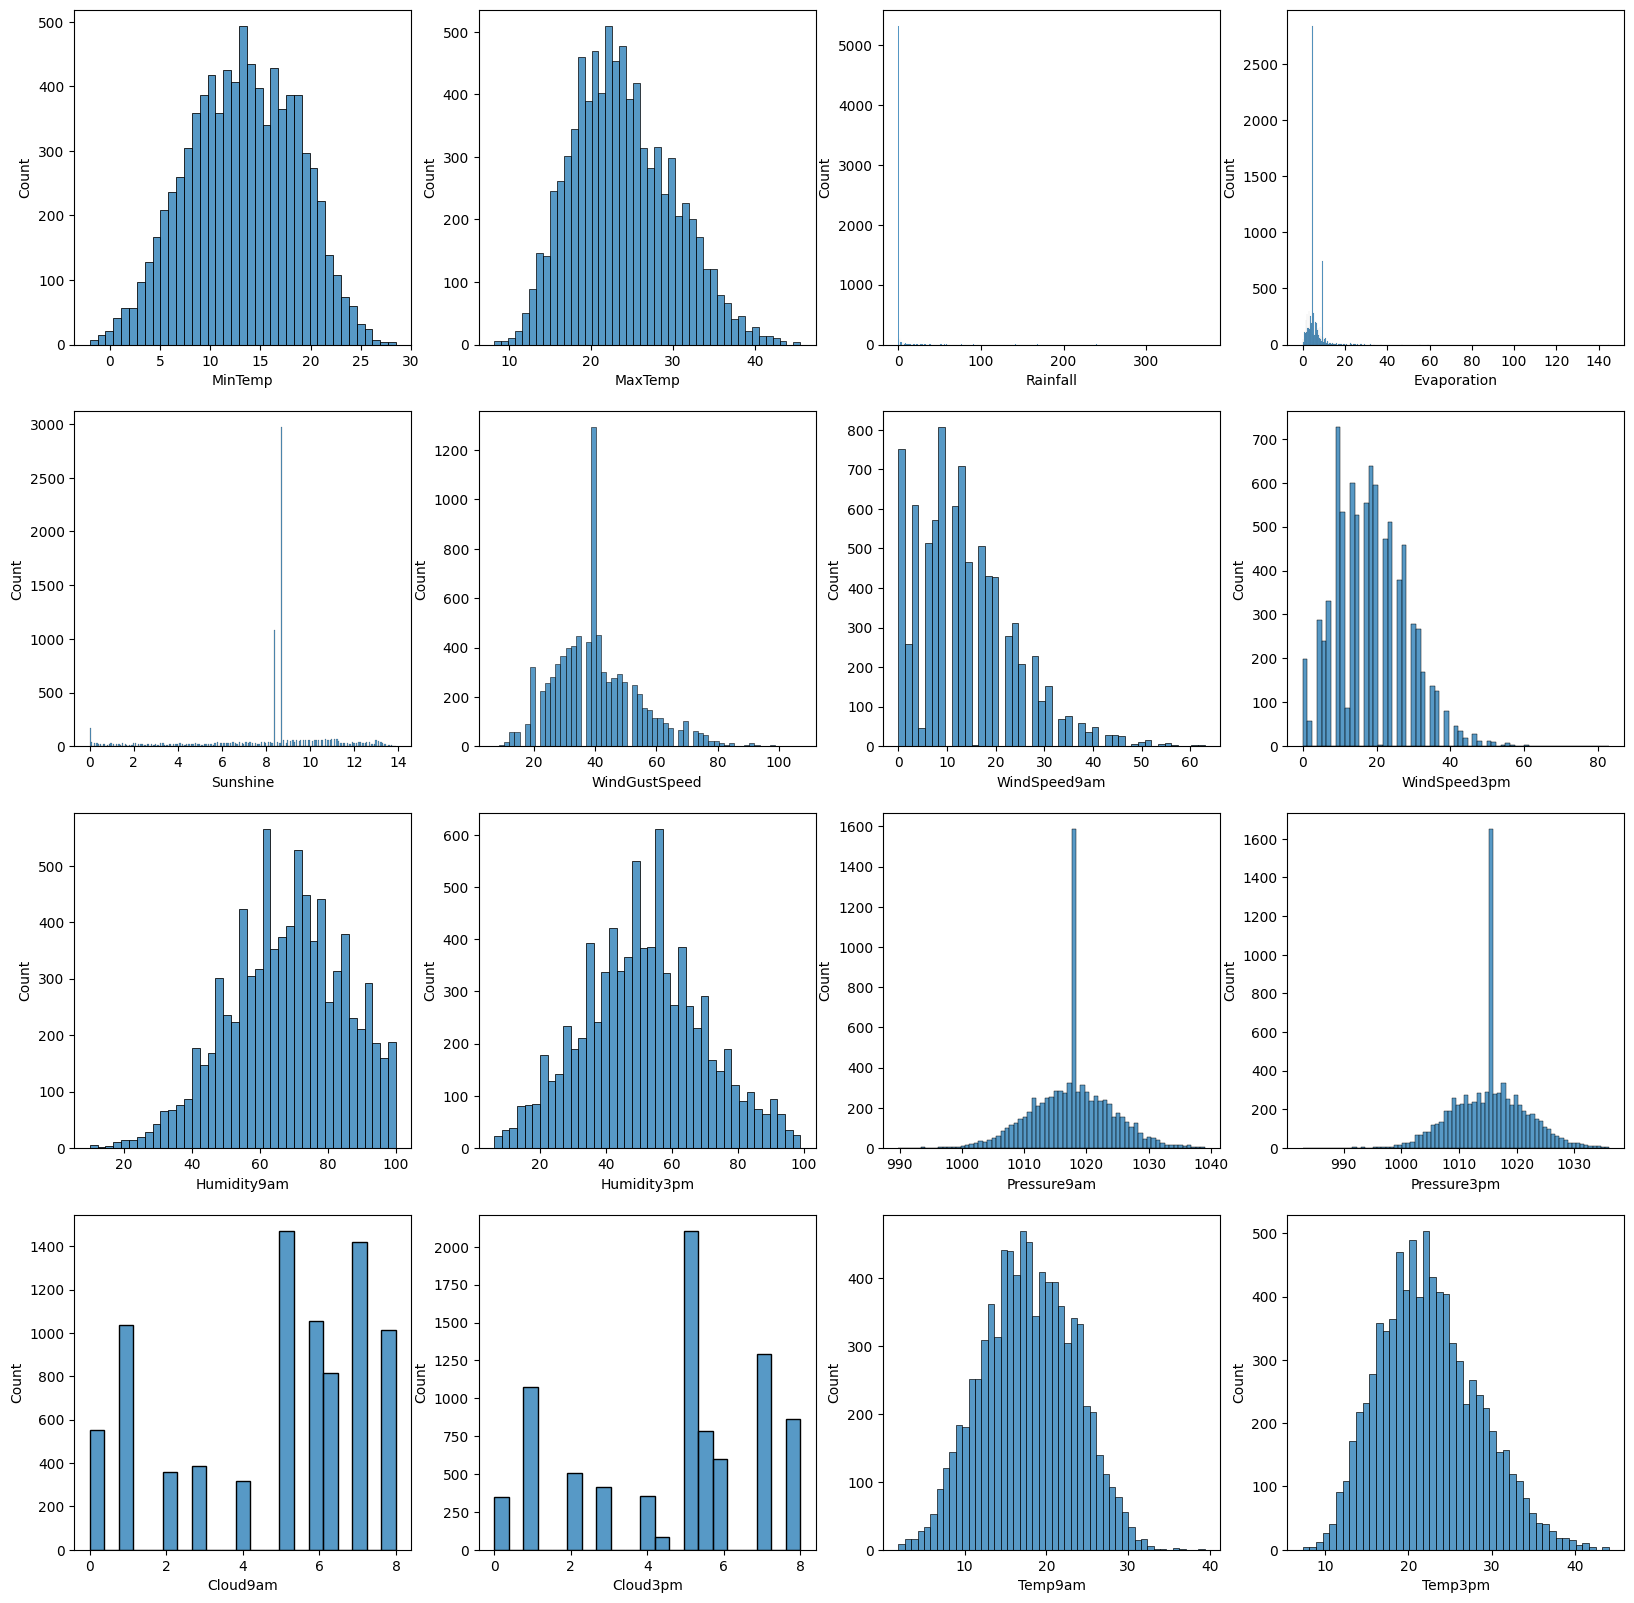

In [ ]:
#ploting distribution of continuous features
plt.figure(figsize=(20,20))
plotno=1
for i in cont_f:
  plt.subplot(4,4,plotno)
  sns.histplot(data=df,x=i)
  plt.xlabel(i)
  plotno+=1
plt.show()

MinTemp, MaxTemp,Humidity9am,Humidity3pm,Tmp9am and Temp3pm are well distributed   
pressure data has outliers in it

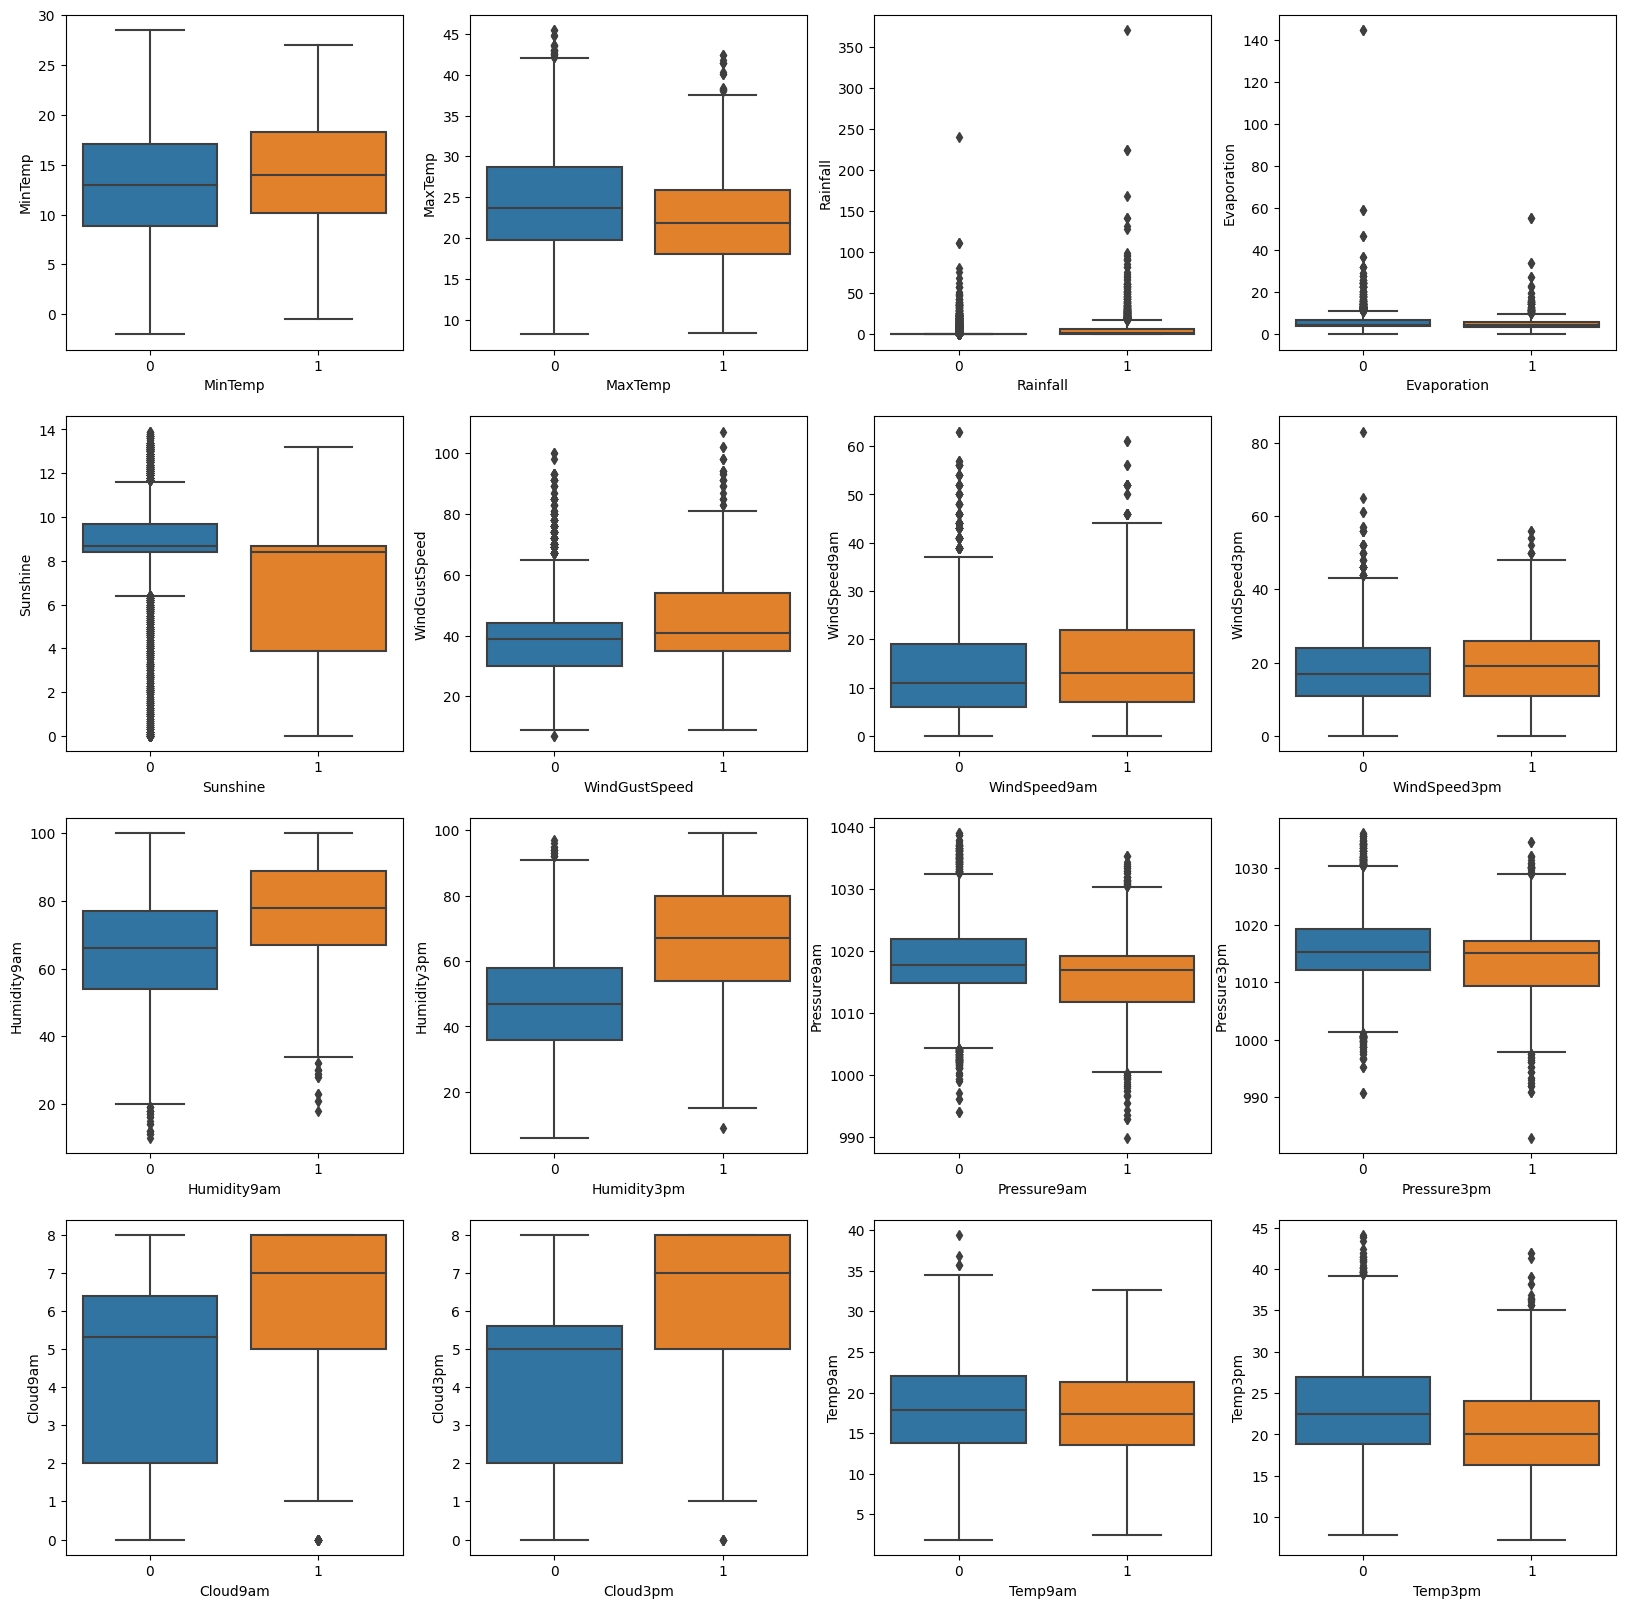

In [ ]:
#ploting relation of continuous features with label
plt.figure(figsize=(20,20))
plotno=1
for i in cont_f:
  plt.subplot(4,4,plotno)
  sns.boxplot(data=df,x=df['RainTomorrow'],y=df[i])
  plt.xlabel(i)

  plotno+=1
plt.show()

If temperature goes byeond 27-28 celsius or less than 11 celsius then there is no rain data  
if sunshine is between 4-9 then the probability of it will rain tomorrow is very high  
if windgust speed is between 45-50 then the probability of it will rain tomorrow is very high  
if humidity at 9am is between 80-90 then the probability of it will rain tomorrow is very high  
if humidity at 3pm is between 60-80 then the probability of it will rain tomorrow is very high   
if Atmospheric pressure  at 9am is between 1011-1015 then the probability of it will rain tomorrow is very high  
if Atmospheric pressure  at 3pm is between 1008-1012 then the probability of it will rain tomorrow is very high  
as much the Fraction of sky obscured by cloud that much the probability of it will rain tomorrow is high(if the Fraction of sky obscured by cloud is very high (more than 7) at 3pm or after 3pm then the probability is more near to one)

**ploting categorical features relatioin with label**

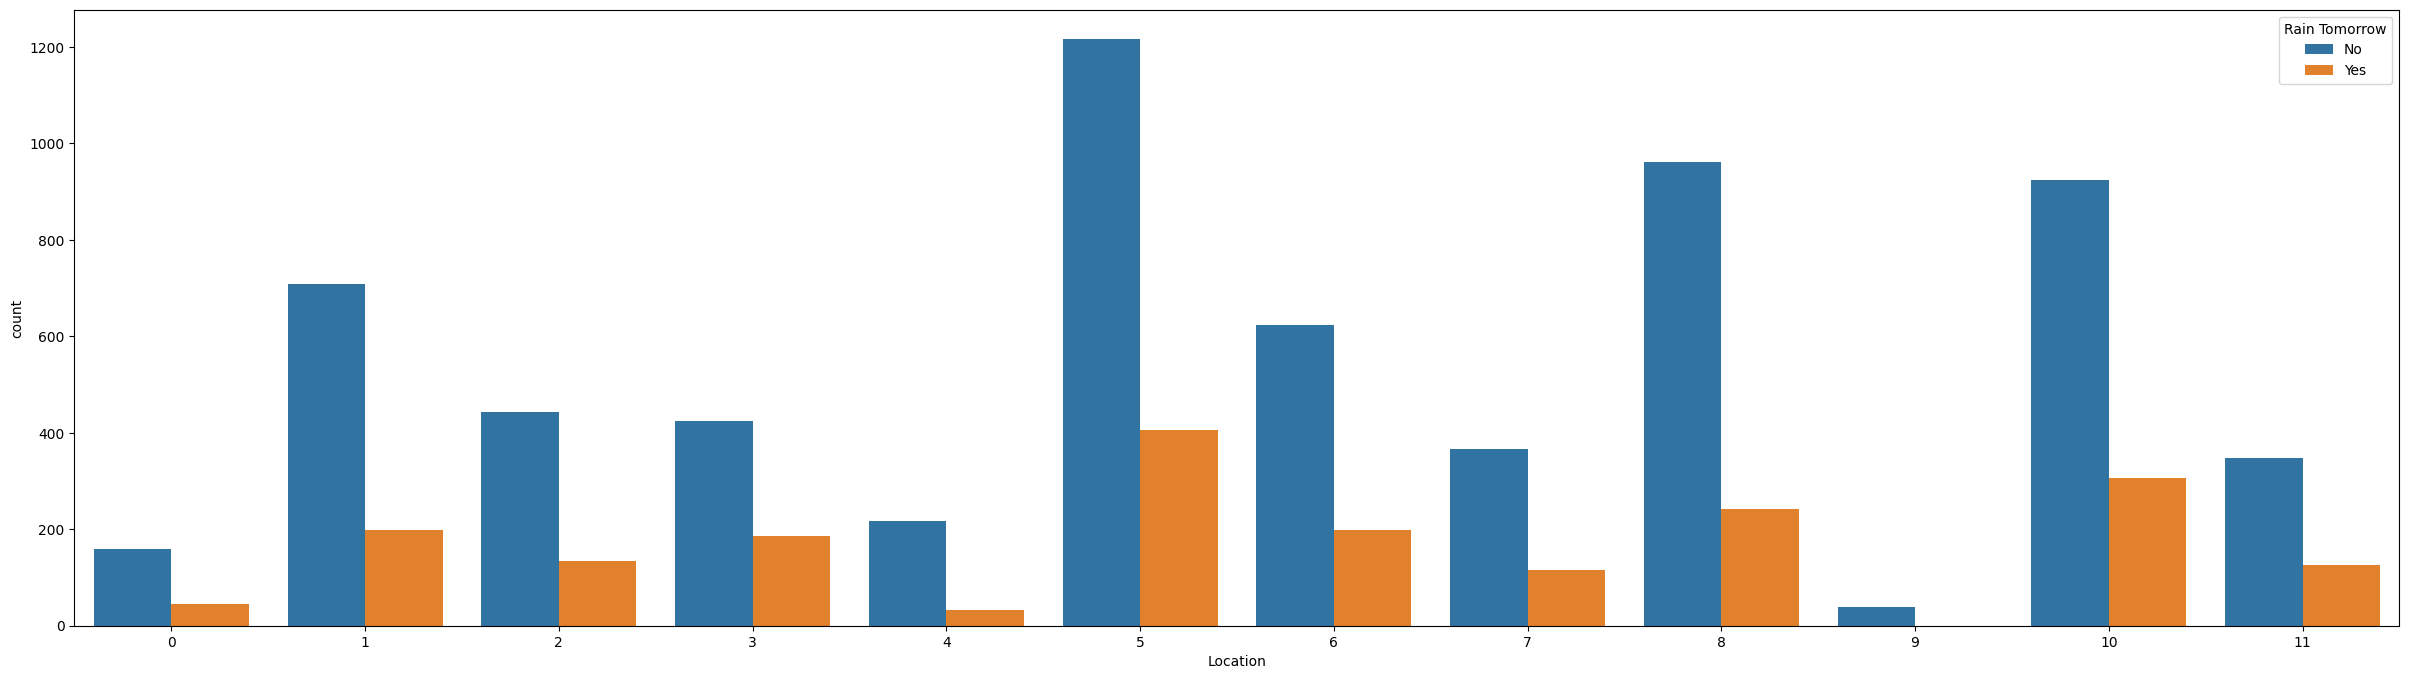

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x=df[cat_f[1]],hue=df['RainTomorrow'])
plt.legend(title='Rain Tomorrow', labels=['No', 'Yes'])
plt.show()

{'Adelaide': 0,
 'Albury': 1,
 'Brisbane': 2,
 'CoffsHarbour': 3,
 'Darwin': 4,
 'Melbourne': 5,
 'Newcastle': 6,
 'Penrith': 7,
 'PerthAirport': 8,
 'Uluru': 9,
 'Williamtown': 10,
 'Wollongong': 11}

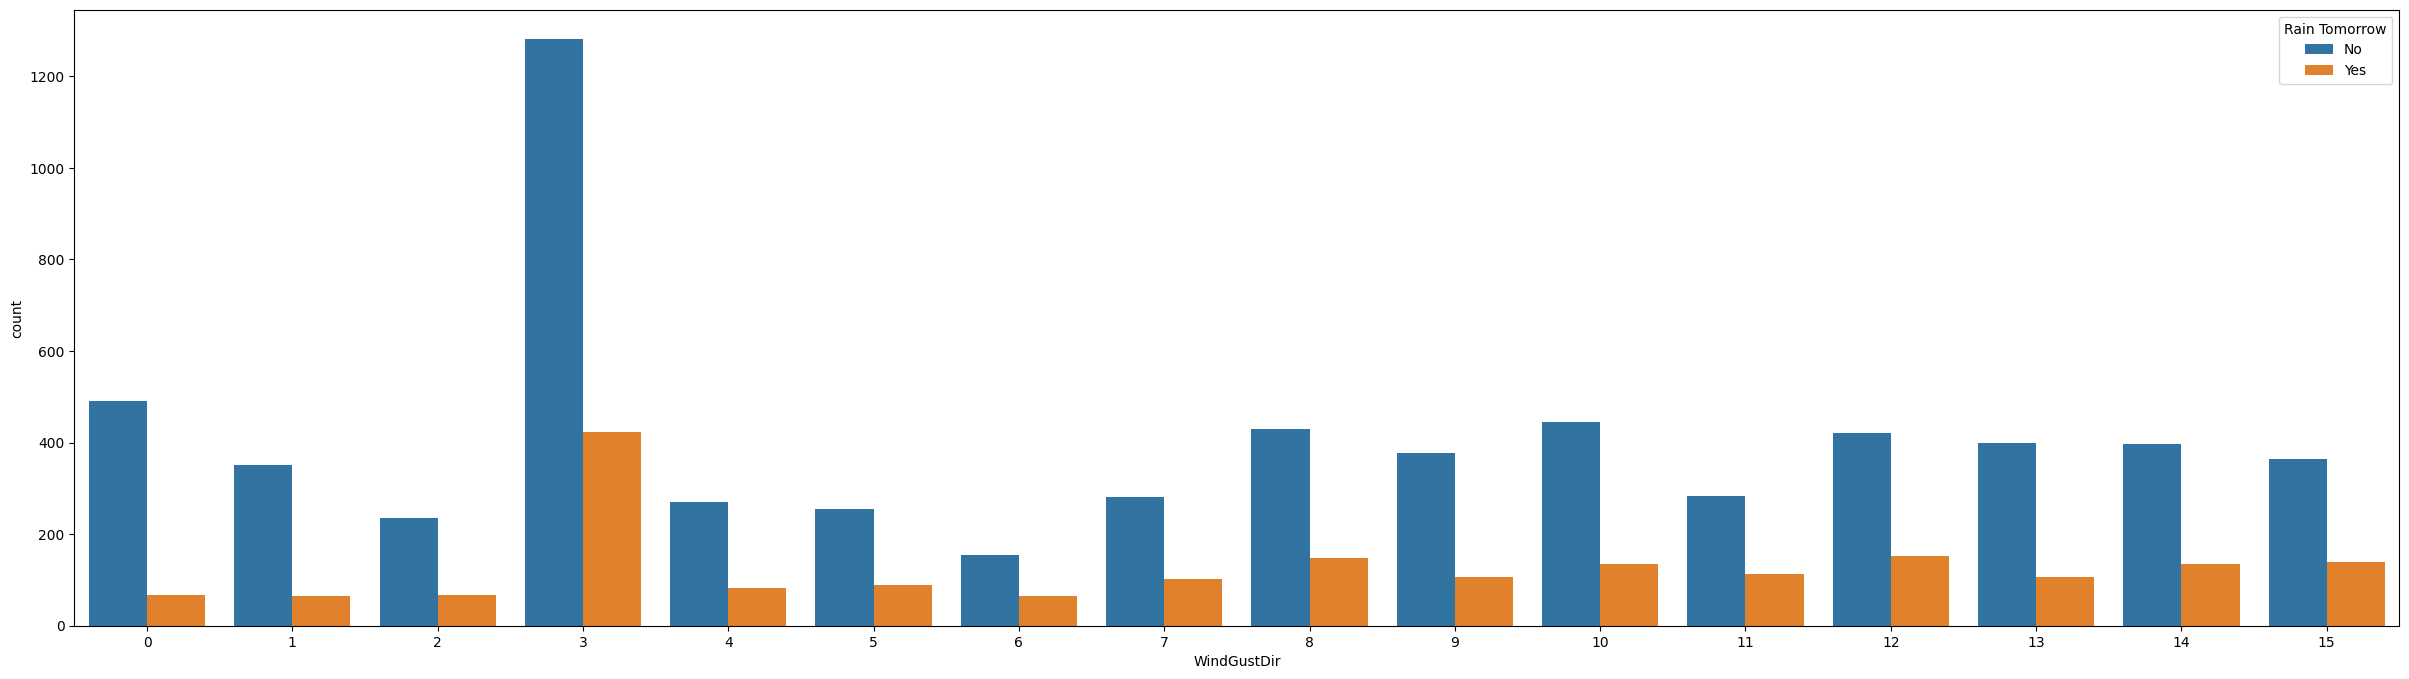

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x=df[cat_f[2]],hue=df['RainTomorrow'])
plt.legend(title='Rain Tomorrow', labels=['No', 'Yes'])
plt.show()

{'E': 0,
 'ENE': 1,
 'ESE': 2,
 'N': 3,
 'NE': 4,
 'NNE': 5,
 'NNW': 6,
 'NW': 7,
 'S': 8,
 'SE': 9,
 'SSE': 10,
 'SSW': 11,
 'SW': 12,
 'W': 13,
 'WNW': 14,
 'WSW': 15}  
 for all directions of windgust has 30-35 chances of rain

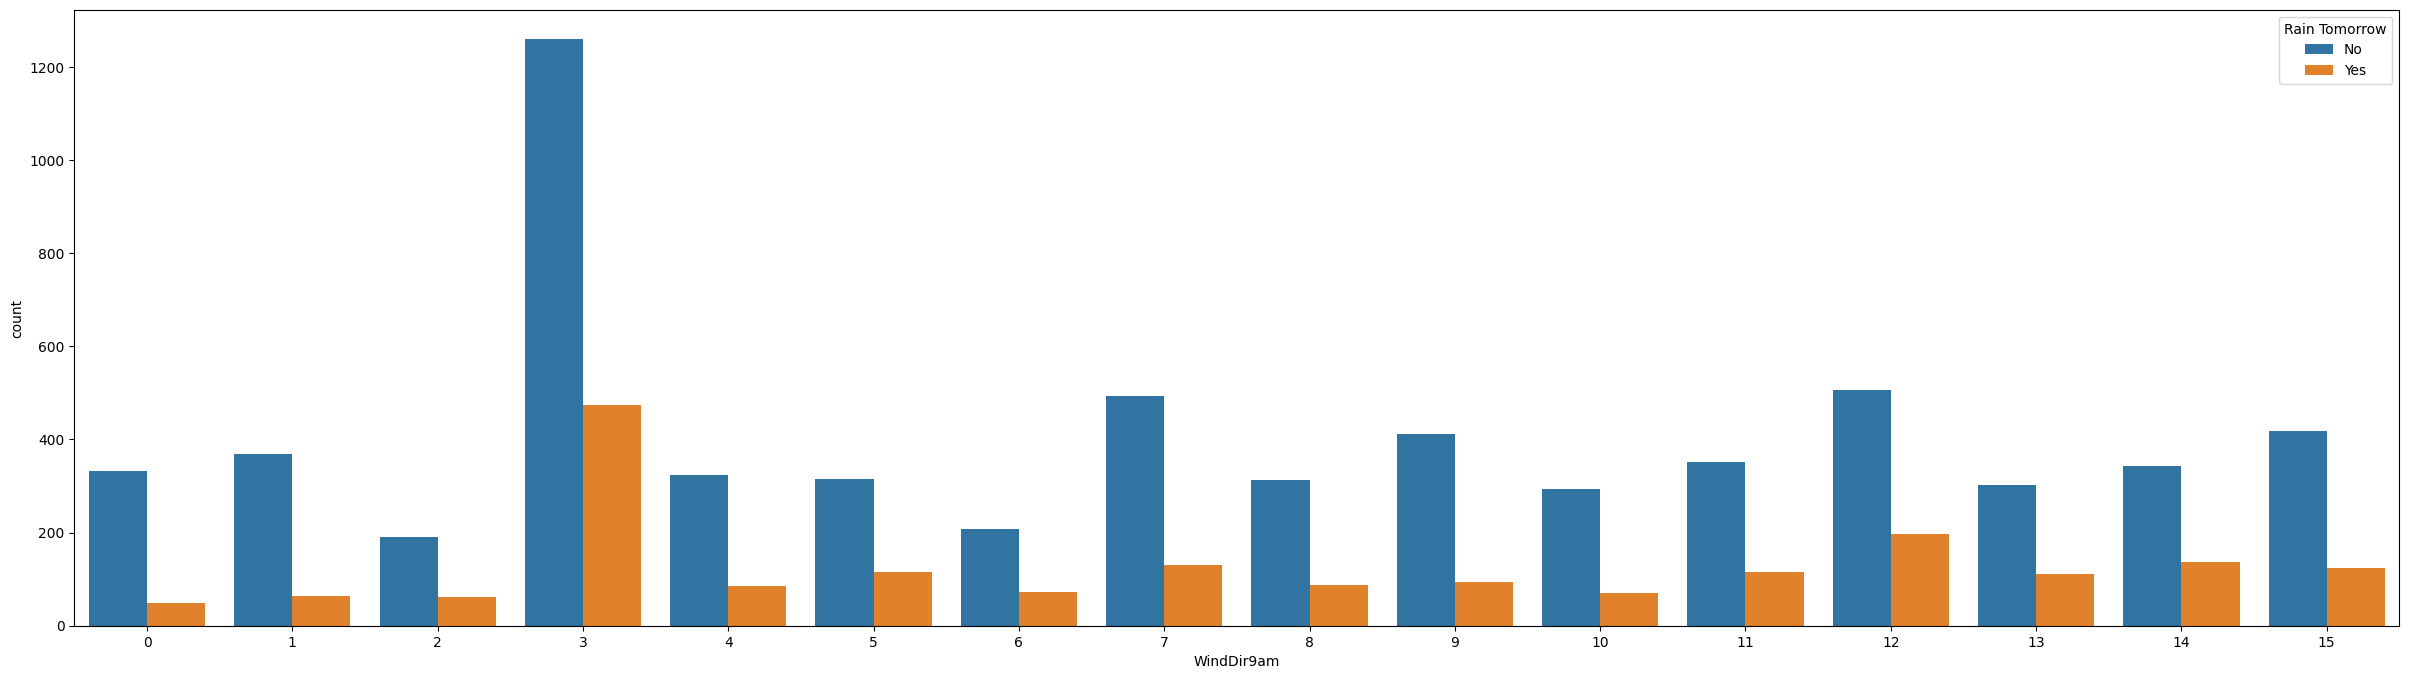

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x=df[cat_f[3]],hue=df['RainTomorrow'])
plt.legend(title='Rain Tomorrow', labels=['No', 'Yes'])
plt.show()


{'E': 0,
 'ENE': 1,
 'ESE': 2,
 'N': 3,
 'NE': 4,
 'NNE': 5,
 'NNW': 6,
 'NW': 7,
 'S': 8,
 'SE': 9,
 'SSE': 10,
 'SSW': 11,
 'SW': 12,
 'W': 13,
 'WNW': 14,
 'WSW': 15}  
 if wind direction is NNE, NNW, SW, W and WNW has more probability that it will rain tomorrow as compare to other dirctions

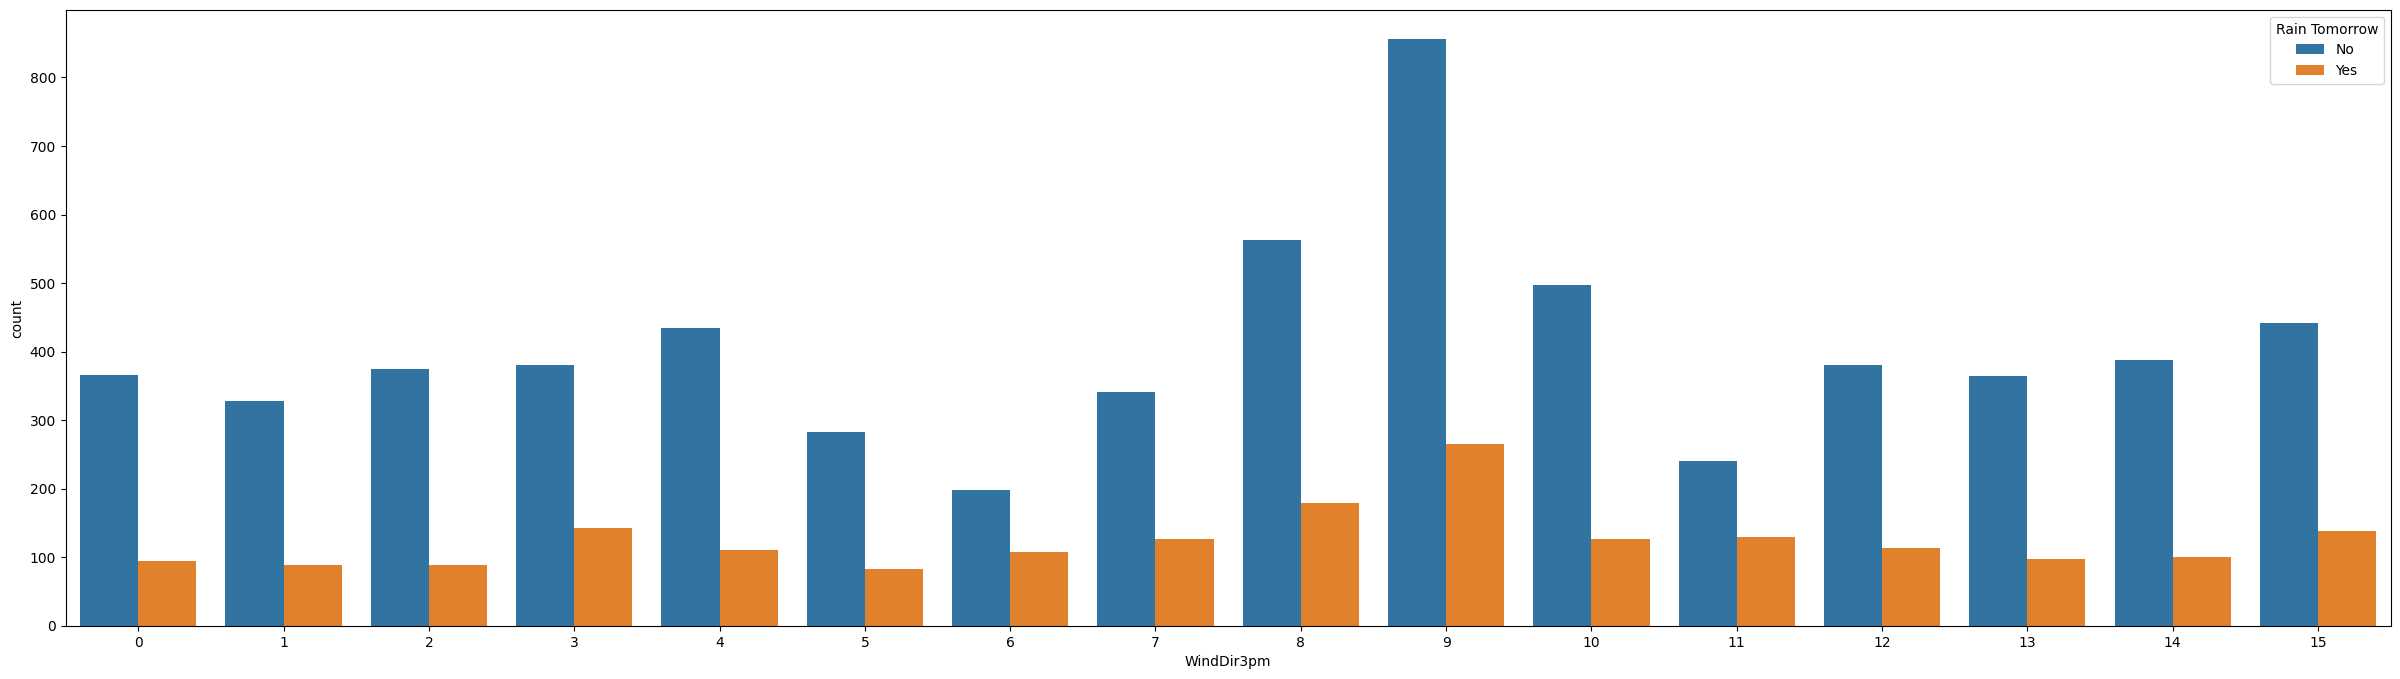

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x=df[cat_f[4]],hue=df['RainTomorrow'])
plt.legend(title='Rain Tomorrow', labels=['No', 'Yes'])
plt.show()

{'E': 0,
 'ENE': 1,
 'ESE': 2,
 'N': 3,
 'NE': 4,
 'NNE': 5,
 'NNW': 6,
 'NW': 7,
 'S': 8,
 'SE': 9,
 'SSE': 10,
 'SSW': 11,
 'SW': 12,
 'W': 13,
 'WNW': 14,
 'WSW': 15}  
  if wind direction at 3pm is NNW or SSW then there is more than 50% chances that it will rain tomorrow, for other directioin it has a less ratio will it  rain tomorrow or not

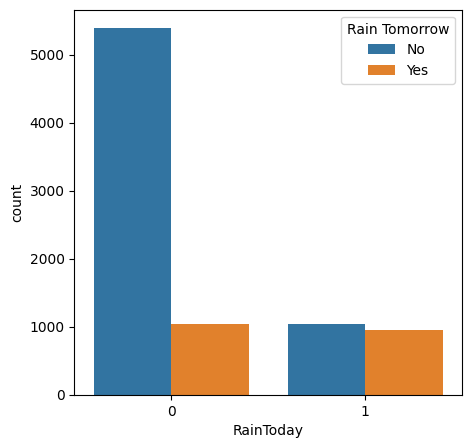

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df[cat_f[5]],hue=df['RainTomorrow'])
plt.legend(title='Rain Tomorrow', labels=['No', 'Yes'])
plt.show()

{'No': 0, 'Yes': 1}  
If it rains today there is a 50% chance that it will rain tomorrow also

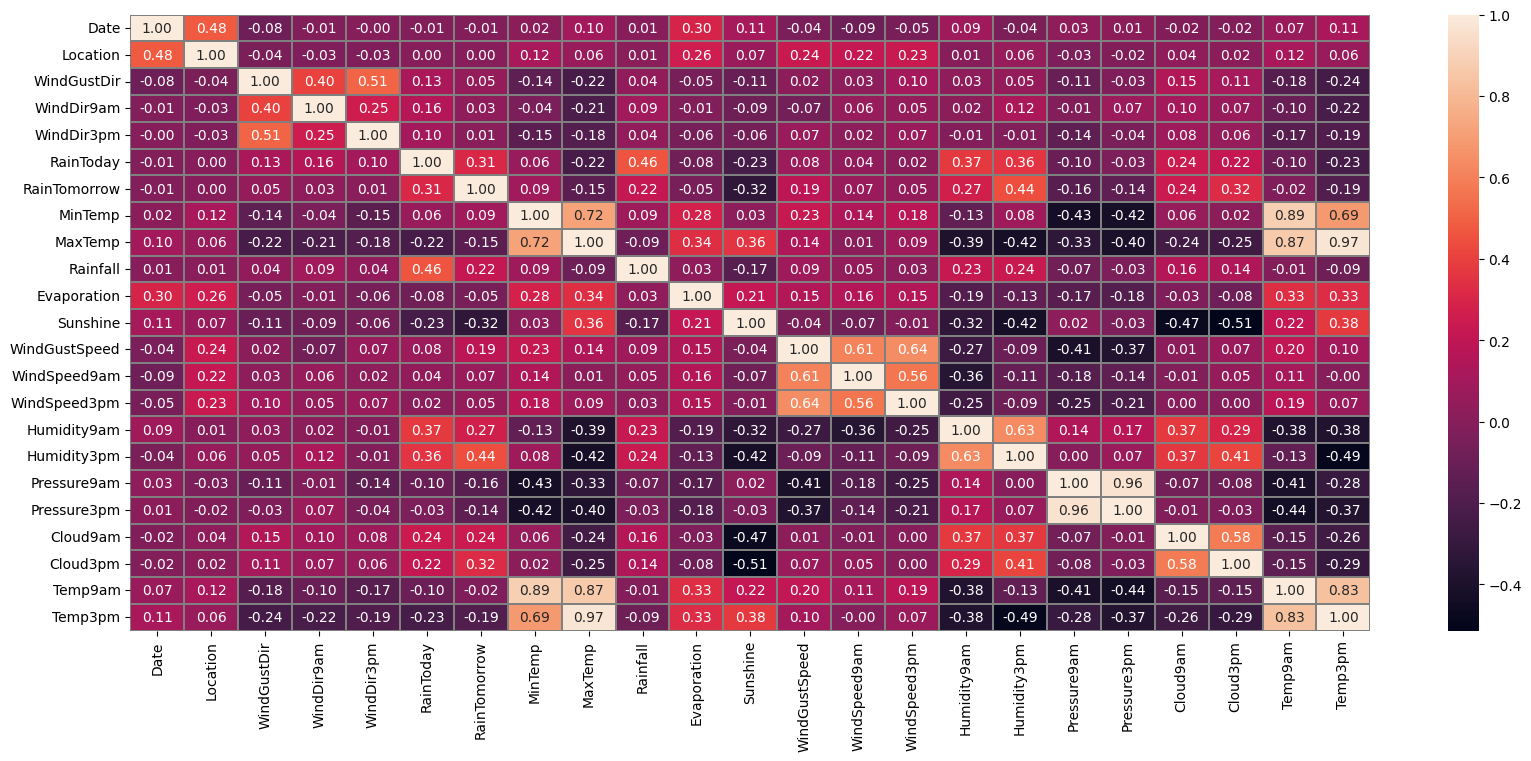

In [ ]:
#check multicollinearity
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='grey',fmt='.2f')
plt.show()

MinTemp and Temp9am are highly correlated  
MaxTemp and Temp3pm are highly correlated  
Pressure9am and Pressure3pm are highly correlated  
Temp9am and Temp3pm are highly correlated  
MaxTemp and MinTemp are highly correlated  

In [ ]:
#check skewness
df.skew()

Date              0.386560
Location         -0.050456
WindGustDir       0.119640
WindDir9am        0.172792
WindDir3pm       -0.119847
RainToday         1.242362
RainTomorrow      1.241588
MinTemp          -0.089385
MaxTemp           0.382165
Rainfall         13.216090
Evaporation      12.144222
Sunshine         -1.154324
WindGustSpeed     0.774754
WindSpeed9am      0.962779
WindSpeed3pm      0.506925
Humidity9am      -0.262759
Humidity3pm       0.107741
Pressure9am      -0.028494
Pressure3pm      -0.015258
Cloud9am         -0.669981
Cloud3pm         -0.518686
Temp9am          -0.013968
Temp3pm           0.398790
dtype: float64

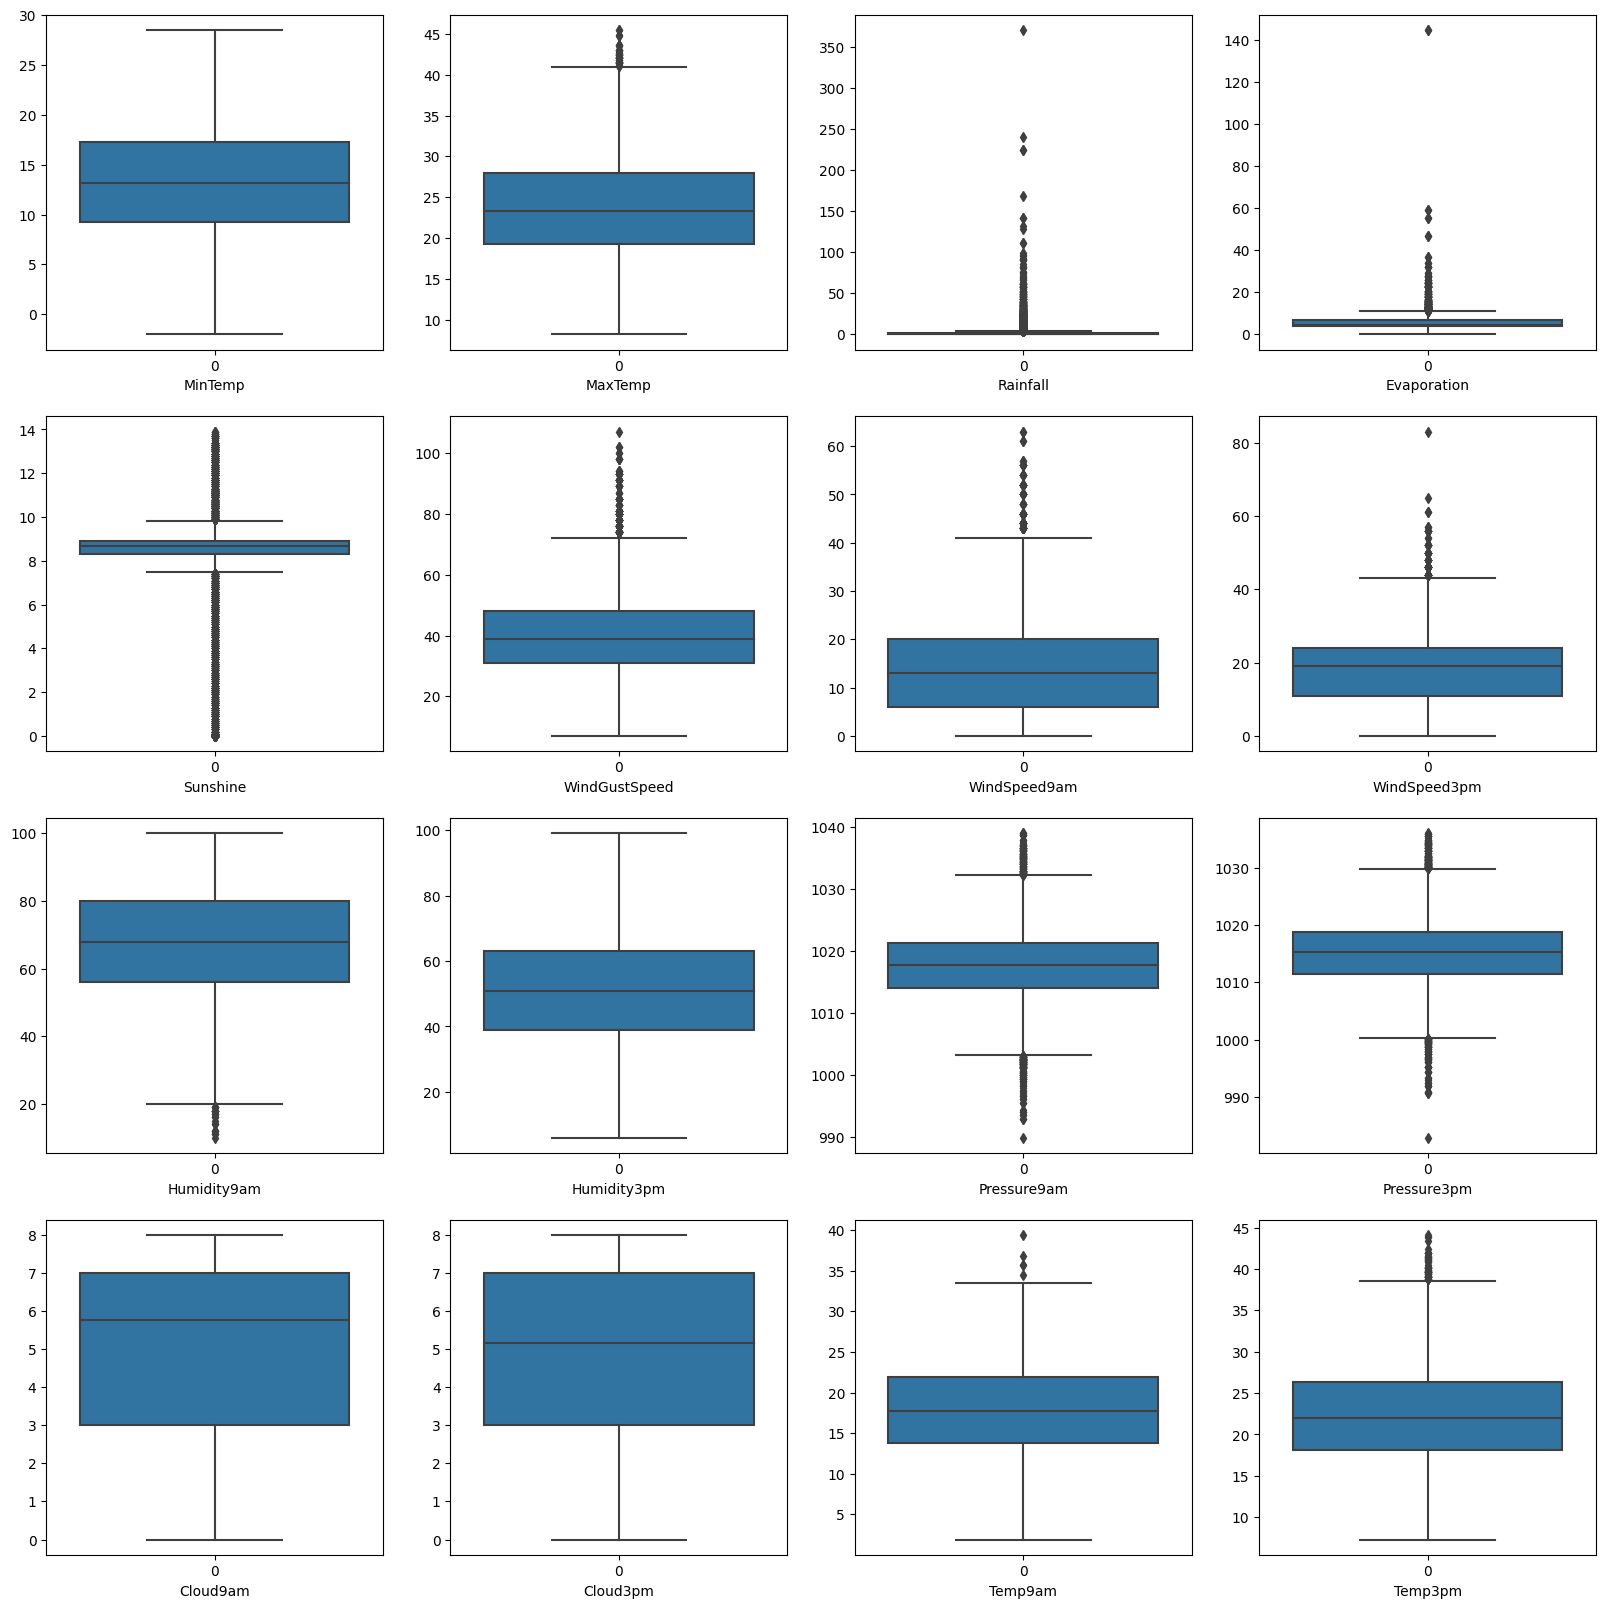

In [ ]:
#check outliers
plt.figure(figsize=(20,20))
plotno=1
for i in cont_f:
  plt.subplot(4,4,plotno)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

Rainfall, Evaporation, Sunshine, WindGustspeed, Windspedd9am, Windspeed3pm, Pressure9am, Pressure3pm has huge outliers

In [ ]:
#removing outliers
zscr=zscore(df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
abs_zscr=np.abs(zscr)
outliers_removed_df=(abs_zscr < 3).all(axis=1)
df=df[outliers_removed_df]

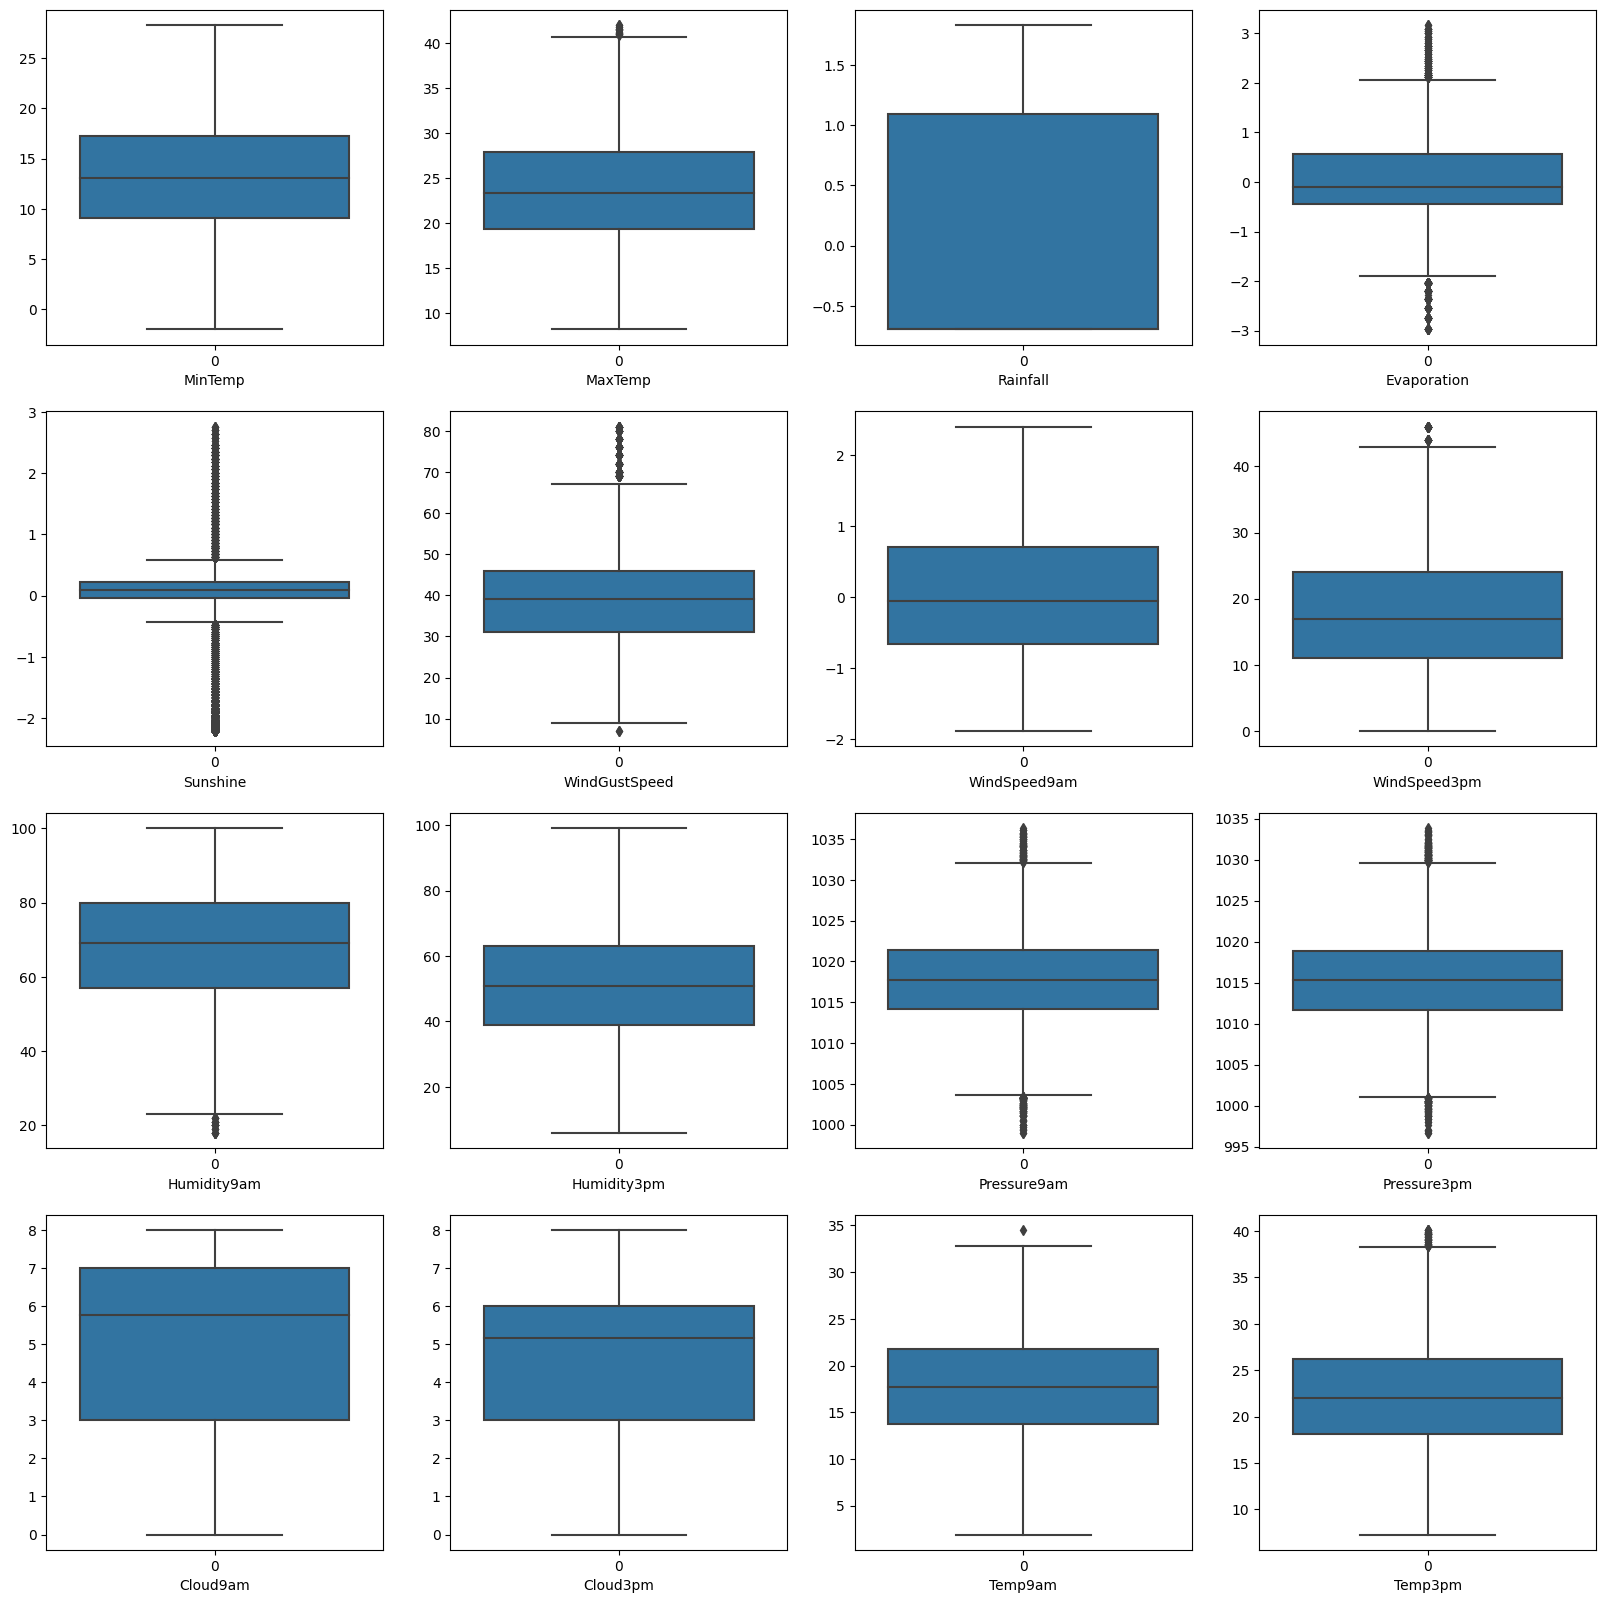

In [ ]:
#check outliers
plt.figure(figsize=(20,20))
plotno=1
for i in cont_f:
  plt.subplot(4,4,plotno)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

In [ ]:
#check skewness
df.skew()

Date             0.398008
Location        -0.040284
WindGustDir      0.112339
WindDir9am       0.160081
WindDir3pm      -0.126255
RainToday        1.301170
RainTomorrow     1.296077
MinTemp         -0.083896
MaxTemp          0.316156
Rainfall         3.486262
Evaporation      0.845001
Sunshine        -1.175446
WindGustSpeed    0.529740
WindSpeed9am     0.716831
WindSpeed3pm     0.316667
Humidity9am     -0.238171
Humidity3pm      0.113854
Pressure9am      0.015990
Pressure3pm      0.039444
Cloud9am        -0.657256
Cloud3pm        -0.506235
Temp9am         -0.037199
Temp3pm          0.335763
dtype: float64

In [ ]:
skewed_featire=['Rainfall','Evaporation','Sunshine','WindSpeed9am']
pwt=PowerTransformer(method='yeo-johnson')
df[skewed_featire]=pwt.fit_transform(df[skewed_featire])
# for i in skewed_featire:
#   df[i]=np.cbrt(df[i])

In [ ]:
#separating feature and label
X=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [ ]:
#check multicolliniearity using vif method
vif=pd.DataFrame()
vif['feature']=X.columns
vif['score']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,feature,score
0,Date,5.408509
1,Location,6.767755
2,WindGustDir,5.400660
3,WindDir9am,4.808157
4,WindDir3pm,6.045512
5,RainToday,5.671026
6,MinTemp,58.480731
7,MaxTemp,438.665907
8,Rainfall,4.798493
9,Evaporation,1.796592


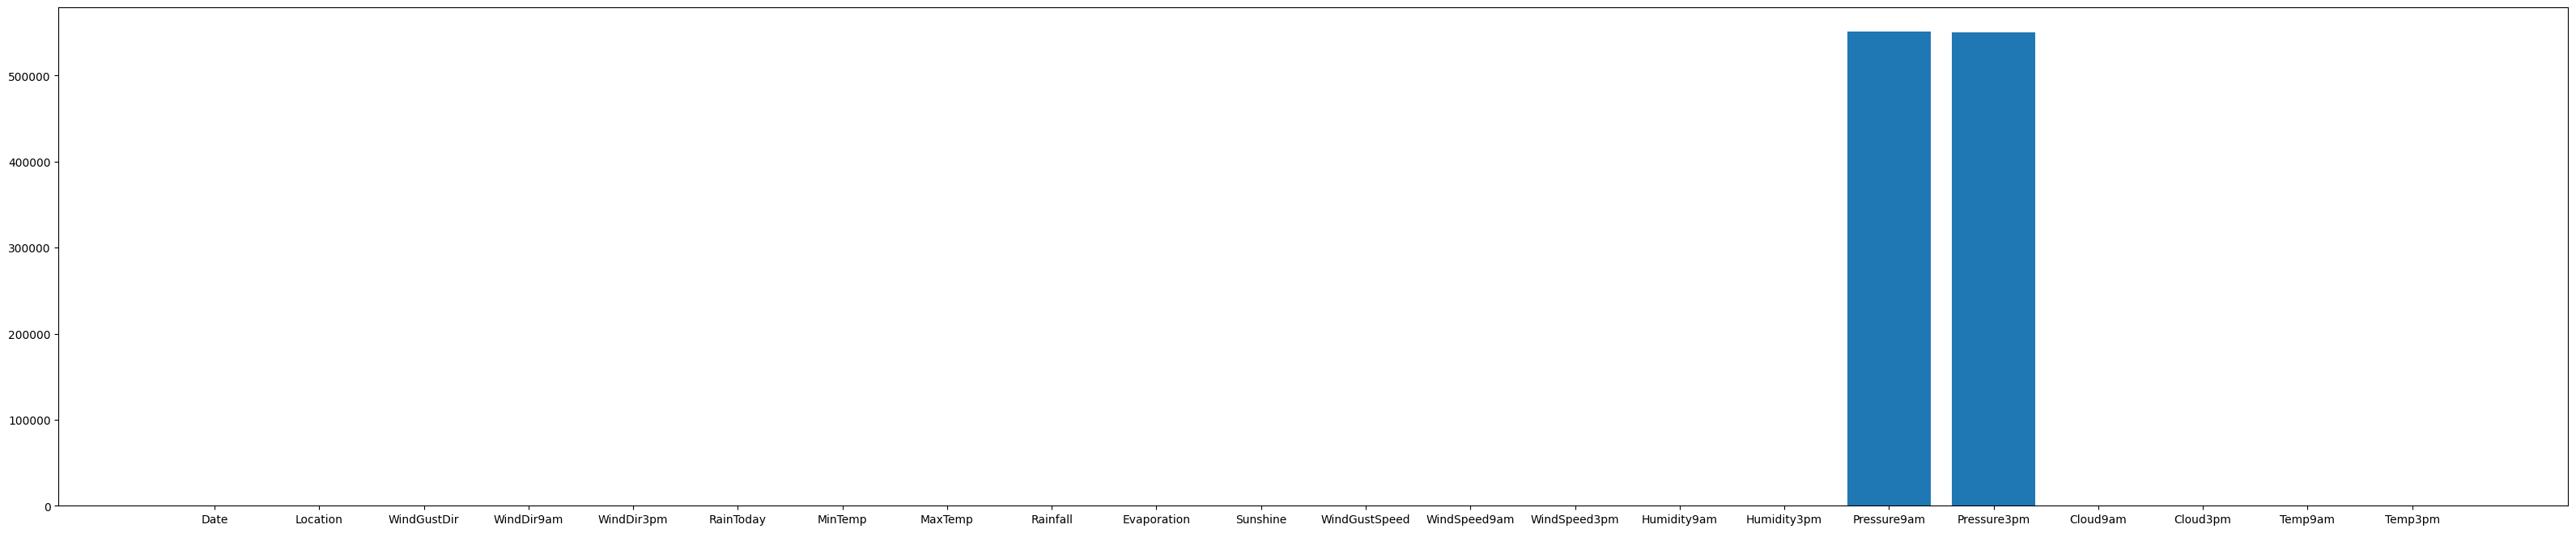

In [ ]:
#plot vif score
plt.figure(figsize=(40,8))
plt.bar(vif['feature'],vif['score'])
plt.show()

In [ ]:
X.drop(columns=['Pressure9am','Pressure3pm'],axis=1,inplace=True)

In [ ]:
#feature selection
selectkbest=SelectKBest(score_func=mutual_info_classif,k=17)
x_best=selectkbest.fit_transform(X,y)

In [ ]:
#scale to normal
scal=StandardScaler()
x_scal=scal.fit_transform(x_best)

In [ ]:
#find random state that split data well
def random_state(alg,x,y):
  maxscore,ind=0,0
  for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    alg.fit(x_train,y_train)
    randompred=alg.predict(x_test)
    score=accuracy_score(y_test,randompred)
    if score > maxscore:
      maxscore=score
      ind=i
  return maxscore,ind

In [ ]:
maxscore,random_state=random_state(LogisticRegression(),x_scal,y)
print(f'maxscore {maxscore} at random state {random_state}')

maxscore 0.8527791687531296 at random state 23


In [ ]:
#spliting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.25,random_state=random_state)

In [ ]:
#deining method for training/building model
def build_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*10,'Training Score','-'*10)
  train_score,test_score=None,None
  train_pred=alg.predict(x_train)
  train_score=accuracy_score(y_train,train_pred)
  print(train_score)
  print('\n','-'*10,'Testing Score','-'*10)
  test_pred,test_score=None,None
  test_pred=alg.predict(x_test)
  test_score=accuracy_score(y_test,test_pred)
  print(test_score)
  print('-'*10,'Confusion Matrix','-'*10)
  print(confusion_matrix(y_test,test_pred))
  return alg,test_score


In [ ]:
#building logisticregression
lc,lcTestScore=build_model(LogisticRegression(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8317195325542571

 ---------- Testing Score ----------
0.8527791687531296
---------- Confusion Matrix ----------
[[1483   67]
 [ 227  220]]


In [ ]:
#building svc
svc,svcTestScore=build_model(SVC(probability=True),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8570951585976627

 ---------- Testing Score ----------
0.8582874311467201
---------- Confusion Matrix ----------
[[1499   51]
 [ 232  215]]


In [ ]:
#building kneighbors
knc,kncTestScore=build_model(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8639398998330551

 ---------- Testing Score ----------
0.8347521281922884
---------- Confusion Matrix ----------
[[1460   90]
 [ 240  207]]


In [ ]:
#building decisiontreeclassifier
dtc,dtcTestScore=build_model(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.8557190317987661
---------- Confusion Matrix ----------
[[1481  160]
 [ 144  322]]


In [ ]:
#building ExtraTreeClassifier
etc,etcTestScore=build_model(ExtraTreeClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.8277171333649739
---------- Confusion Matrix ----------
[[1445  196]
 [ 167  299]]


In [ ]:
#building RandomForestClassifier
rfc,rfcTestScore=build_model(RandomForestClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.8984337921214998
---------- Confusion Matrix ----------
[[1588   53]
 [ 161  305]]


In [ ]:
#building AdaBoostClassifier
abc,abcTestScore=build_model(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8382399493510605

 ---------- Testing Score ----------
0.8514475557664927
---------- Confusion Matrix ----------
[[1542   99]
 [ 214  252]]


In [ ]:
#building GradientBoostingClassifier
gbc,gbTestScore=build_model(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8586578031022476

 ---------- Testing Score ----------
0.8623635500711913
---------- Confusion Matrix ----------
[[1558   83]
 [ 207  259]]


In [ ]:
#building XGBClassifier
xgb,xgbTestScore=build_model(XGBClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9920861031972144

 ---------- Testing Score ----------
0.8970099667774086
---------- Confusion Matrix ----------
[[1565   76]
 [ 141  325]]


In [ ]:
#cross validation
def crosscheck(alg,test_score=None):
  cv=cross_val_score(alg,x_train,y_train)
  cvmean=round(((cv.mean())*100),2)
  testing_score=round(test_score*100,2)
  print('-'*63)
  print('|  ',cv,' |')
  print('-'*63)
  print('|  cv.mean    |    testing score    |         difference      |')
  print('-'*63)
  print(f'|  {cvmean}      |          {testing_score}      |           {round(cvmean-testing_score,2)}         |')
  print('-'*63)

In [ ]:
#Cross validation of logisticregression
crosscheck(LogisticRegression(),lcTestScore)

---------------------------------------------------------------
|   [0.81566456 0.82357595 0.81882911 0.82581156 0.83214568]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  82.32      |          85.19      |           -2.87         |
---------------------------------------------------------------


In [ ]:
#Cross validation of SVC
crosscheck(SVC(),svcTestScore)

---------------------------------------------------------------
|   [0.83860759 0.82674051 0.83227848 0.83135392 0.83847981]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  83.35      |          86.0      |           -2.65         |
---------------------------------------------------------------


In [ ]:
#Cross validation of KneighborsClassifier
crosscheck(KNeighborsClassifier(),kncTestScore)

---------------------------------------------------------------
|   [0.80221519 0.81408228 0.79746835 0.80443389 0.81393508]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  80.64      |          83.86      |           -3.22         |
---------------------------------------------------------------


In [ ]:
#Cross validation of DecisionTreeClassifier
crosscheck(DecisionTreeClassifier(),dtcTestScore)

---------------------------------------------------------------
|   [0.81962025 0.81566456 0.82278481 0.7925574  0.82581156]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  81.53      |          85.57      |           -4.04         |
---------------------------------------------------------------


In [ ]:
#Cross validation of ExtraTreeCLassifier
crosscheck(ExtraTreeClassifier(),etcTestScore)

---------------------------------------------------------------
|   [0.79825949 0.78401899 0.79984177 0.81631037 0.8202692 ]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  80.37      |          82.77      |           -2.4         |
---------------------------------------------------------------


In [ ]:
#Cross validation of RandomForestClassifier
crosscheck(RandomForestClassifier(),rfcTestScore)

---------------------------------------------------------------
|   [0.88449367 0.86234177 0.86867089 0.8733175  0.87885986]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  87.35      |          89.84      |           -2.49         |
---------------------------------------------------------------


In [ ]:
#Cross validation of AdaBoostClassifier
crosscheck(AdaBoostClassifier(),abcTestScore)

---------------------------------------------------------------
|   [0.83227848 0.82278481 0.81012658 0.82739509 0.83056215]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  82.46      |          85.14      |           -2.68         |
---------------------------------------------------------------


In [ ]:
#Cross validation of GradientBoostingClassifier
crosscheck(GradientBoostingClassifier(),gbTestScore)

---------------------------------------------------------------
|   [0.84493671 0.83227848 0.83148734 0.83768804 0.84243864]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  83.78      |          86.24      |           -2.46         |
---------------------------------------------------------------


In [ ]:
#Cross validation of XGBCLassifier
crosscheck(XGBClassifier(),xgbTestScore)

---------------------------------------------------------------
|   [0.88370253 0.85838608 0.86234177 0.86698337 0.87885986]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  87.01      |          89.7      |           -2.69         |
---------------------------------------------------------------


In [ ]:
#calculating probabilities
lc_prob=lc.predict_proba(x_test)[:,1]
svc_prob=svc.predict_proba(x_test)[:,1]
knc_prob=knc.predict_proba(x_test)[:,1]
dt_prob=dtc.predict_proba(x_test)[:,1]
et_prob=etc.predict_proba(x_test)[:,1]
rfc_prob=rfc.predict_proba(x_test)[:,1]
abc_prob=abc.predict_proba(x_test)[:,1]
gbc_prob=gbc.predict_proba(x_test)[:,1]
xgb_prob=xgb.predict_proba(x_test)[:,1]

In [ ]:
#calculating fpr,tpr and threshold
lc_fpr,lc_tpr,lc_threshold=roc_curve(y_test,lc_prob)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,svc_prob)
knc_fpr,knc_tpr,knc_threshold=roc_curve(y_test,knc_prob)
dt_fpr,dt_tpr,dt_threshold=roc_curve(y_test,dt_prob)
et_fpr,et_tpr,et_threshold=roc_curve(y_test,et_prob)
rfc_fpr,rfc_tpr,rfc_threshold=roc_curve(y_test,rfc_prob)
abc_fpr,abc_tpr,abc_threshold=roc_curve(y_test,abc_prob)
gbc_fpr,gbc_tpr,gbc_threshold=roc_curve(y_test,gbc_prob)
xgb_fpr,xgb_tpr,xgb_threshold=roc_curve(y_test,xgb_prob)

In [ ]:
#calculating auc score
lc_auc=roc_auc_score(y_test,lc_prob)
svc_auc=roc_auc_score(y_test,svc_prob)
knc_auc=roc_auc_score(y_test,knc_prob)
dt_auc=roc_auc_score(y_test,dt_prob)
et_auc=roc_auc_score(y_test,et_prob)
rfc_auc=roc_auc_score(y_test,rfc_prob)
abc_auc=roc_auc_score(y_test,abc_prob)
gbc_auc=roc_auc_score(y_test,gbc_prob)
xgb_auc=roc_auc_score(y_test,xgb_prob)

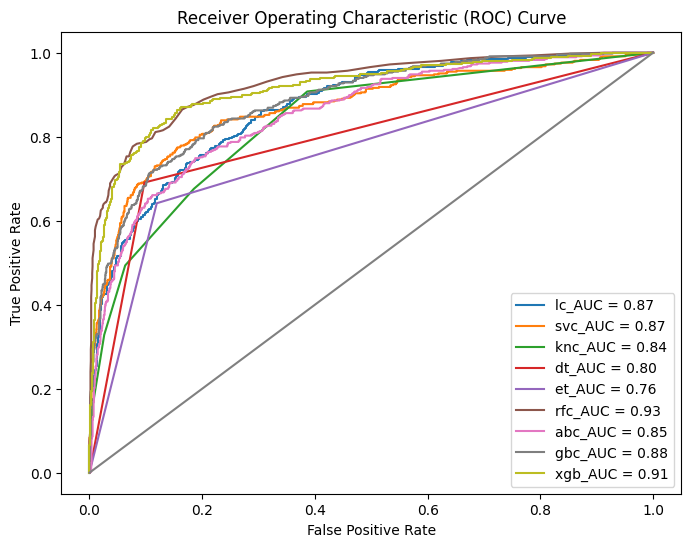

In [ ]:
#ploting roc curve
plt.figure(figsize=(8, 6))
plt.plot(lc_fpr, lc_tpr, label=f'lc_AUC = {lc_auc:.2f}')
plt.plot(svc_fpr, svc_tpr, label=f'svc_AUC = {svc_auc:.2f}')
plt.plot(knc_fpr, knc_tpr, label=f'knc_AUC = {knc_auc:.2f}')
plt.plot(dt_fpr, dt_tpr, label=f'dt_AUC = {dt_auc:.2f}')
plt.plot(et_fpr, et_tpr, label=f'et_AUC = {et_auc:.2f}')
plt.plot(rfc_fpr, rfc_tpr, label=f'rfc_AUC = {rfc_auc:.2f}')
plt.plot(abc_fpr, abc_tpr, label=f'abc_AUC = {abc_auc:.2f}')
plt.plot(gbc_fpr, gbc_tpr, label=f'gbc_AUC = {gbc_auc:.2f}')
plt.plot(xgb_fpr, xgb_tpr, label=f'xgb_AUC = {xgb_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

RandomForestClassifier si woroking well

In [ ]:
#parameter tuning
param_grid = {

    'n_estimators': [100, 200, 300,350],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,3],
    'bootstrap':[True,False],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)


print("Best parameters:", grid_result.best_params_)

Best parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [ ]:
#building RandomForestClassifier
rfc,rfcTestScore=build_model(RandomForestClassifier(min_samples_split=4),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9973092750870529

 ---------- Testing Score ----------
0.8984337921214998
---------- Confusion Matrix ----------
[[1582   59]
 [ 155  311]]


In [ ]:
#Cross validation of RandomForestClassifier
crosscheck(RandomForestClassifier(),rfcTestScore)

---------------------------------------------------------------
|   [0.88370253 0.86708861 0.87025316 0.87173397 0.87648456]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  87.39      |          89.84      |           -2.45         |
---------------------------------------------------------------


In [ ]:
#model saving
import pickle as pkl
pkl.dump(rfc,open('rainforcasting_rfc.sav','wb'))

In [ ]:
#model loading
model=pkl.load(open('rainforcasting_rfc.sav','rb'))

In [ ]:
#comparing original and predicted label
cmp_df=pd.DataFrame()
cmp_df['tmrrain']=y_test
cmp_df['predTmrRain']=model.predict(x_test)
cmp_df

,tmrrain,predTmrRain
4838,0,0
1511,1,1
7152,0,0
7797,1,0
4916,0,0
...,...,...
8061,0,0
7835,1,1
4749,0,0
7131,1,1


# Predication how much rain could be there

In [ ]:
#separating features and label for second section
X=df.drop('Rainfall',axis=1)
y=df['Rainfall']

In [ ]:
X.drop(columns=['Pressure9am','Pressure3pm'],axis=1,inplace=True)

In [ ]:
#feature selection
selectkbest=SelectKBest(score_func=f_regression,k=17)
x_best=selectkbest.fit_transform(X,y)

In [ ]:
#scale to normal
scal=StandardScaler()
x_scal=scal.fit_transform(x_best)

In [ ]:
#find random state that split data well
def random_state(alg,x,y):
  maxscore,ind=0,0
  for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    alg.fit(x_train,y_train)
    randompred=alg.predict(x_test)
    score=r2_score(y_test,randompred)
    if score > maxscore:
      maxscore=score
      ind=i
  return maxscore,ind

In [ ]:
maxscore,random_state=random_state(LinearRegression(),x_scal,y)
print(f'maxscore {maxscore} at random state {random_state}')

maxscore 0.8109857727657578 at random state 92


In [ ]:
#spliting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.25,random_state=random_state)

In [ ]:
#deining method for training/building model
def build_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*10,'Training Score','-'*10)
  train_score,test_score=None,None
  train_pred=alg.predict(x_train)
  train_score=r2_score(y_train,train_pred)
  print(train_score)
  print('\n','-'*10,'Testing Score','-'*10)
  test_pred,test_score=None,None
  test_pred=alg.predict(x_test)
  test_score=r2_score(y_test,test_pred)
  print(test_score)
  print('-'*10,'Mean Absolute Error','-'*10)
  mae=mean_absolute_error(y_test,test_pred)
  print(mae)
  return alg,test_score,mae


In [ ]:
#building LinearRegression
lr,lrTestScore,lrmae=build_model(LinearRegression(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.7817491177711939

 ---------- Testing Score ----------
0.8109857727657578
---------- Mean Absolute Error ----------
0.28187587723957847


In [ ]:
#building svr
svr,svrTestScore,svrmae=build_model(SVR(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8151231405451806

 ---------- Testing Score ----------
0.8203664454950754
---------- Mean Absolute Error ----------
0.21817728687627538


In [ ]:
#building kneighborsregressor
knr,knrTestScore,knrmae=build_model(KNeighborsRegressor(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8532768578059606

 ---------- Testing Score ----------
0.793530159400201
---------- Mean Absolute Error ----------
0.2547103765202271


In [ ]:
#building decisiontreeregressor
dtr,dtrTestScore,dtrmae=build_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9981662489328675

 ---------- Testing Score ----------
0.8126504357881988
---------- Mean Absolute Error ----------
0.1764560125963941


In [ ]:
#building ExtraTreeClassifier
etr,etrTestScore,etrmae=build_model(ExtraTreeRegressor(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9981662489328675

 ---------- Testing Score ----------
0.8045265065580305
---------- Mean Absolute Error ----------
0.1777647024161785


In [ ]:
#building RandomForestRegressor
rfr,rfrTestScore,rtrmae=build_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9812391688668128

 ---------- Testing Score ----------
0.8892174326575417
---------- Mean Absolute Error ----------
0.2035699263608577


In [ ]:
#building AdaBoostRegressor
abr,abrTestScore,abrmae=build_model(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.7439177459769553

 ---------- Testing Score ----------
0.75934335935878
---------- Mean Absolute Error ----------
0.39766536054405416


In [ ]:
#building GradientBoostingClassifier
gbr,gbrTestScore,gbrmae=build_model(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8363081682349772

 ---------- Testing Score ----------
0.8389536867393976
---------- Mean Absolute Error ----------
0.25779899790177


In [ ]:
#building XGBRegressor
xgbr,xgbrTestScore,xgbrmae=build_model(XGBRegressor(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9782955338693052

 ---------- Testing Score ----------
0.8848488443145857
---------- Mean Absolute Error ----------
0.20272376379469387


In [ ]:
#cross validation
def crosscheck(alg,test_score=None):
  cv=cross_val_score(alg,x_train,y_train)
  cvmean=round(((cv.mean())*100),2)
  testing_score=round(test_score*100,2)
  print('-'*63)
  print('|  ',cv,' |')
  print('-'*63)
  print('|  cv.mean    |    testing score    |         difference      |')
  print('-'*63)
  print(f'|  {cvmean}      |          {testing_score}      |           {round(cvmean-testing_score,2)}         |')
  print('-'*63)

In [ ]:
#Cross validation of linearregression
crosscheck(LinearRegression(),lrTestScore)

---------------------------------------------------------------
|   [0.77184865 0.81006494 0.73652786 0.79634826 0.7855376 ]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  78.01      |          81.1      |           -3.09         |
---------------------------------------------------------------


In [ ]:
#Cross validation of SVR
crosscheck(SVR(),svrTestScore)

---------------------------------------------------------------
|   [0.77717711 0.82015479 0.74080524 0.79492825 0.78691094]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  78.4      |          82.04      |           -3.64         |
---------------------------------------------------------------


In [ ]:
#Cross validation of KneighborsRegressor
crosscheck(KNeighborsRegressor(),knrTestScore)

---------------------------------------------------------------
|   [0.77269288 0.78947049 0.73946197 0.75799305 0.76441057]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  76.48      |          79.35      |           -2.87         |
---------------------------------------------------------------


In [ ]:
#Cross validation of DecisionTreeRegressor
crosscheck(DecisionTreeRegressor(),dtrTestScore)

---------------------------------------------------------------
|   [0.7624841  0.76517492 0.73294863 0.7364895  0.77854618]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  75.51      |          81.27      |           -5.76         |
---------------------------------------------------------------


In [ ]:
#Cross validation of ExtraTreeregressor
crosscheck(ExtraTreeRegressor(),etrTestScore)

---------------------------------------------------------------
|   [0.7327898  0.78347694 0.73294133 0.7259577  0.77033232]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  74.91      |          80.45      |           -5.54         |
---------------------------------------------------------------


In [ ]:
#Cross validation of RandomForestRegressor
crosscheck(RandomForestRegressor(),rfrTestScore)

---------------------------------------------------------------
|   [0.87544248 0.89129963 0.8449346  0.85764704 0.87047357]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  86.8      |          88.92      |           -2.12         |
---------------------------------------------------------------


In [ ]:
#Cross validation of AdaBoostRegressor
crosscheck(AdaBoostRegressor(),abrTestScore)

---------------------------------------------------------------
|   [0.75099623 0.77692209 0.73134778 0.76624247 0.76474736]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  75.81      |          75.93      |           -0.12         |
---------------------------------------------------------------


In [ ]:
#Cross validation of GradientBoostingRegressor
crosscheck(GradientBoostingRegressor(),gbrTestScore)

---------------------------------------------------------------
|   [0.8117729  0.84089773 0.77170059 0.82477591 0.8188949 ]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  81.36      |          83.9      |           -2.54         |
---------------------------------------------------------------


In [ ]:
#Cross validation of XGBRegressor
crosscheck(XGBRegressor(),xgbrTestScore)

---------------------------------------------------------------
|   [0.86731624 0.87686573 0.82492009 0.85434878 0.86203904]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  85.71      |          88.48      |           -2.77         |
---------------------------------------------------------------


Randomforest model working well

In [ ]:
#parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid)
grid_result = grid_search.fit(x_train, y_train)


print("Best parameters:", grid_result.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
#building RandomForestClassifier
tune_rfr,rfrTestScore,rfrmae=build_model(RandomForestRegressor(max_depth=20,n_estimators=300,min_samples_leaf=1,min_samples_split=2),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9817708193384269

 ---------- Testing Score ----------
0.8914936588442005
---------- Mean Absolute Error ----------
0.20198917163683178


In [ ]:
#model saving
import pickle as pkl
pkl.dump(tune_rfr,open('rainforcasting_tunerfr.sav','wb'))
#model loading
model=pkl.load(open('rainforcasting_tunerfr.sav','rb'))

In [ ]:
#comparing original and predicted label
cmp_df=pd.DataFrame()
cmp_df['org_rainfall']=y_test
cmp_df['predTmrRain']=model.predict(x_test)
cmp_df